# Object detection imports

In [8]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from distutils.version import StrictVersion
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
from object_detection.utils import ops as utils_ops

if StrictVersion(tf.__version__) < StrictVersion('1.9.0'):
  raise ImportError('Please upgrade your TensorFlow installation to v1.9.* or later!')

from utils import label_map_util
from utils import visualization_utils as vis_util
%matplotlib inline

# Model preparation 

## Get train & eval data

* git 中运行下面的命令，生成pascal_train.record和pascal_val.record
python object_detection/dataset_tools/create_pascal_tf_record.py 
--label_map_path=object_detection/data/pascal_label_map.pbtxt 
--data_dir=trainVOCdata/VOCdevkit 
--year=VOC2012 
--set=train 
--output_path=pascal_train.record;
python object_detection/dataset_tools/create_pascal_tf_record.py 
--label_map_path=object_detection/data/pascal_label_map.pbtxt 
--data_dir=trainVOCdata/VOCdevkit 
--year=VOC2012 
--set=val 
--output_path=pascal_val.record

* 报错  
File "object_detection/dataset_tools/create_pascal_tf_record.py", line 37, in <module>
     from object_detection.utils import dataset_util
 ModuleNotFoundError: No module named 'object_detection'
解决方法：https://blog.csdn.net/weixin_41683218/article/details/81214785   C:\Anaconda3\Lib\site-packages

In [2]:
# From tensorflow/models/research/  
# wget http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar
# tar -xvf VOCtrainval_11-May-2012.tar

# From tensorflow/models/research/    
# 下述命令运行无反应

# %run object_detection/dataset_tools/create_pascal_tf_record.py \
#     --label_map_path=object_detection/data/pascal_label_map.pbtxt \
#     --data_dir=trainVOCdata/VOCdevkit --year=VOC2012 --set=train \
#     --output_path=pascal_train.record
# %run object_detection/dataset_tools/create_pascal_tf_record.py \
#     --label_map_path=object_detection/data/pascal_label_map.pbtxt \
#     --data_dir=trainVOCdata/VOCdevkit --year=VOC2012 --set=val \
#     --output_path=pascal_val.record  

## Configration
* 在object_detection/trainVOCdata增加配置文件ssd_inception_v2_voc2012,并修改其中的具体内容

# Model training

In [ ]:
# From the tensorflow/models/research/
%run C:/Users/Xuzl/IntelligentConnectedAuto/python/Project4-Tensorflow/models/research/object_detection/legacy/train.py \
    --logtostderr \
    --pipeline_config_path="C:/Users/Xuzl/IntelligentConnectedAuto/python/Project4-Tensorflow/models/research/trainVOCdata/ssd_inception_v2_voc2012.config" \
    --train_dir="C:/Users/Xuzl/IntelligentConnectedAuto/python/Project4-Tensorflow/models/research"\
    --eval_dir="C:/Users/Xuzl/IntelligentConnectedAuto/python/Project4-Tensorflow/models/research"

C:\Users\Xuzl\IntelligentConnectedAuto\python\Project4-Tensorflow\models\research\object_detection\utils\visualization_utils.py:27: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "

Instructions for updating:
Use object_detection/model_main.py.


W1221 16:05:51.247157  6740 tf_logging.py:125] From C:\Anaconda3\lib\site-packages\tensorflow\python\platform\app.py:125: main (from __main__) is deprecated and will be removed in a future version.
Instructions for updating:
Use object_detection/model_main.py.


* git中的训练命令

python C:/Users/Xuzl/IntelligentConnectedAuto/python/Project4-Tensorflow/models/research/object_detection/legacy/train.py   --logtostderr    --pipeline_config_path="C:/Users/Xuzl/IntelligentConnectedAuto/python/Project4-Tensorflow/models/research/trainVOCdata/ssd_inception_v2_voc2012.config"     --train_dir="C:/Users/Xuzl/IntelligentConnectedAuto/python/Project4-Tensorflow/models/research"    --eval_dir="C:/Users/Xuzl/IntelligentConnectedAuto/python/Project4-Tensorflow/models/research"

# 导出模型

In [ ]:
python object_detection/export_inference_graph.py\
--input_type image_tensor\
--pipeline_config_path ssd_mobilenet_v2_coco.config\
--trained_checkpoint_prefix /home/crj/tensorflow/dataset/model.ckpt-20649\
--output_directory output_inference_graph


# 模型测试

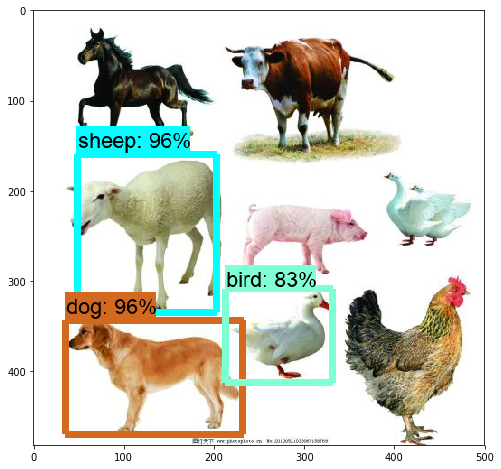

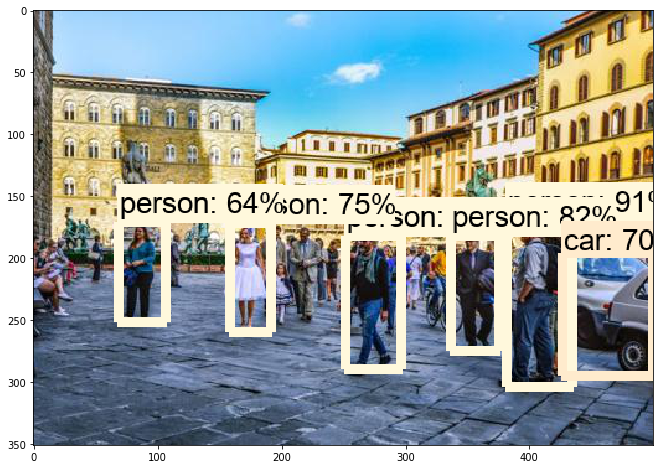

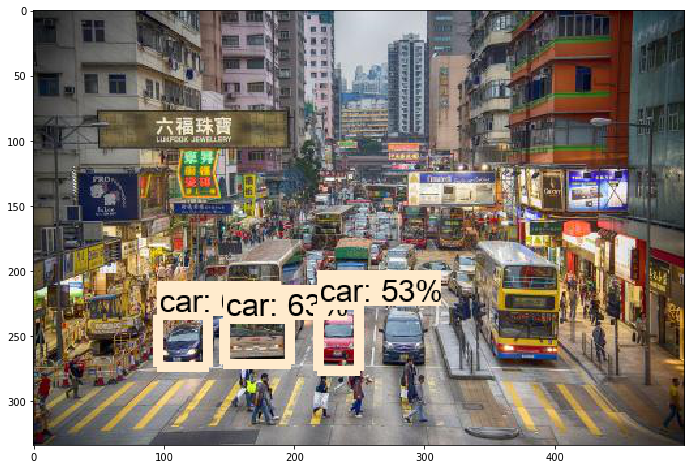

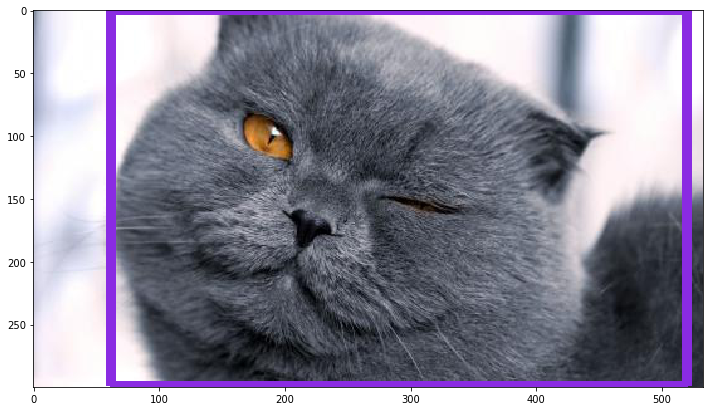

In [9]:
import os

import numpy as np
import tensorflow as tf
from PIL import Image
from matplotlib import pyplot as plt
from object_detection.utils import ops as utils_ops
from utils import label_map_util
from utils import visualization_utils as vis_util
from distutils.version import StrictVersion

# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_CKPT = 'C:/Users/Xuzl/IntelligentConnectedAuto/python/Project4-Tensorflow/export/frozen_inference_graph.pb'

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = 'C:/Users/Xuzl/IntelligentConnectedAuto/python/Project4-Tensorflow/models/research/object_detection/data/pascal_label_map.pbtxt '
#PATH_TO_LABELS = os.path.join('data', 'pascal_label_map.pbtxt')

NUM_CLASSES = 20

if tf.__version__ < StrictVersion('1.9.0'):
    raise ImportError(
        'Please upgrade your tensorflow installation to v1.4.* or later!')

detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(
    label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)


def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape(
        (im_height, im_width, 3)).astype(np.uint8)



# If you want to test the code with your images, just add path to the images to the TEST_IMAGE_PATHS.
PATH_TO_TEST_IMAGES_DIR = 'test_images'
TEST_IMAGE_PATHS = [os.path.join(
    PATH_TO_TEST_IMAGES_DIR, image) for image in os.listdir(PATH_TO_TEST_IMAGES_DIR)]

# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)


def run_inference_for_single_image(image, graph):
    with graph.as_default():
        with tf.Session() as sess:
            # Get handles to input and output tensors
            ops = tf.get_default_graph().get_operations()
            all_tensor_names = {output.name for op in ops for output in op.outputs}
            tensor_dict = {}
            for key in [
                'num_detections', 'detection_boxes', 'detection_scores',
                'detection_classes', 'detection_masks'
            ]:
                tensor_name = key + ':0'
                if tensor_name in all_tensor_names:
                    tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
                        tensor_name)
            if 'detection_masks' in tensor_dict:
                # The following processing is only for single image
                detection_boxes = tf.squeeze(tensor_dict['detection_boxes'], [0])
                detection_masks = tf.squeeze(tensor_dict['detection_masks'], [0])
                # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
                real_num_detection = tf.cast(
                    tensor_dict['num_detections'][0], tf.int32)
                detection_boxes = tf.slice(detection_boxes, [0, 0], [
                    real_num_detection, -1])
                detection_masks = tf.slice(detection_masks, [0, 0, 0], [
                    real_num_detection, -1, -1])
                detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
                    detection_masks, detection_boxes, image.shape[0], image.shape[1])
                detection_masks_reframed = tf.cast(
                    tf.greater(detection_masks_reframed, 0.5), tf.uint8)
                # Follow the convention by adding back the batch dimension
                tensor_dict['detection_masks'] = tf.expand_dims(
                    detection_masks_reframed, 0)
            image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

            # Run inference
            output_dict = sess.run(tensor_dict,
                                   feed_dict={image_tensor: np.expand_dims(image, 0)})

            # all outputs are float32 numpy arrays, so convert types as appropriate
            output_dict['num_detections'] = int(output_dict['num_detections'][0])
            output_dict['detection_classes'] = output_dict[
                'detection_classes'][0].astype(np.uint8)
            output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
            output_dict['detection_scores'] = output_dict['detection_scores'][0]
            if 'detection_masks' in output_dict:
                output_dict['detection_masks'] = output_dict['detection_masks'][0]
    return output_dict


for image_path in TEST_IMAGE_PATHS:
    image = Image.open(image_path)
    # the array based representation of the image will be used later in order to prepare the
    # result image with boxes and labels on it.
    image_np = load_image_into_numpy_array(image)
    # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
    image_np_expanded = np.expand_dims(image_np, axis=0)
    # Actual detection.
    output_dict = run_inference_for_single_image(image_np, detection_graph)
    # Visualization of the results of a detection.
    vis_util.visualize_boxes_and_labels_on_image_array(
        image_np,
        output_dict['detection_boxes'],
        output_dict['detection_classes'],
        output_dict['detection_scores'],
        category_index,
        instance_masks=output_dict.get('detection_masks'),
        use_normalized_coordinates=True,
        line_thickness=8)
    plt.figure(figsize=IMAGE_SIZE)
    plt.imshow(image_np)
plt.show()